<a href="https://colab.research.google.com/github/Priti-Kannaujiya/DeepLearning-FromScratch/blob/main/Pooling%26Padding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D

In [ ]:
import kagglehub
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

Using Colab cache for faster access to the 'mnist-in-csv' dataset.


In [ ]:
import os
os.listdir(path)

['mnist_test.csv', 'mnist_train.csv']

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/mnist_train.csv")
df.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
df.iloc[0]

,0
label,5
1x1,0
1x2,0
1x3,0
1x4,0
...,...
28x24,0
28x25,0
28x26,0
28x27,0


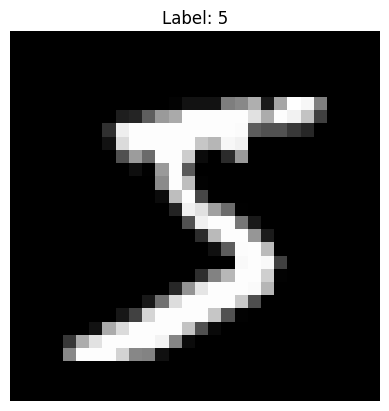

In [ ]:
import matplotlib.pyplot as plt

# Get the first row (image data and label)
first_image_data = df.iloc[0]

# Extract the label and pixel data
label = first_image_data['label']
pixel_data = first_image_data[1:].values.reshape(28, 28)

# Display the image
plt.imshow(pixel_data, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off') # Hide axes ticks and labels
plt.show()

In [ ]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(28,28,1)),
    Conv2D( filters=16, kernel_size=(3,3), activation='relu', padding='valid'),
    Conv2D( filters=16, kernel_size=(3,3), activation='relu', padding='valid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 16)     │         2,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,264 (28.38 KB)

 Trainable params: 7,264 (28.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',strides=1,padding='same',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Conv2D(16,kernel_size=(3,3),activation='relu',strides=2,padding='same'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Conv2D(16,kernel_size=(3,3),activation='relu',strides=2,padding='same')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 16)       │         2,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,264 (28.38 KB)

 Trainable params: 7,264 (28.38 KB)

 Non-trainable params: 0 (0.00 B)